In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib

In [5]:
df = pd.read_csv("diabetes_symptoms.csv")

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [8]:
for col in df.drop('Age',axis=1):
    print(df[col].unique())

['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


<Axes: xlabel='Age'>

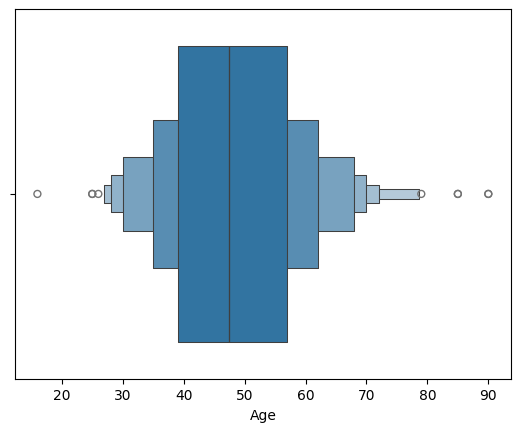

In [9]:
# visualiser les outliers 

sns.boxenplot(data=df, x='Age')

In [10]:
df.loc[(df['Age']>=70)| (df['Age']<= 22)] = df['Age'].median()

C:\Users\HP\AppData\Local\Temp\ipykernel_19436\624604576.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age']>=70)| (df['Age']<= 22)] = df['Age'].median()


In [11]:
df.isna().sum() # verifier s'il ya un nan dans notre dataset

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [12]:
# hot encoding for categorical data
df = pd.get_dummies(df,columns= df.drop('Age',axis=1).columns,drop_first=True,dtype=int)
df

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,class_Negative,class_Positive
0,40.0,0,1,1,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,58.0,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
2,41.0,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
3,45.0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,60.0,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,1,0,0,1,0,1,0,1,1,...,0,1,1,0,1,0,1,0,0,1
516,48.0,1,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
517,58.0,1,0,0,1,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,1
518,32.0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0


In [13]:
df = df.rename(columns={'class_Positive_True_True_True_True_True': 'class'})
df = df.rename(columns={'class_Negative_True_True_True_True_True': 'class_Negative'})
df = df.rename(columns={'Obesity_Yes_True_True_True_True_True': 'Obesity_Yes'})
df = df.rename(columns={'Obesity_No_True_True_True_True_True': 'Obesity_NO'})
df = df.rename(columns={'Alopecia_Yes_True_True_True_True_True': 'Alopecia_Yes'})
df = df.rename(columns={'Alopecia_No_True_True_True_True_True': 'Alopecia_No'})
df = df.rename(columns={'muscle stiffness_Yes_True_True_True_True_True': 'musclestiffness_Yes_'})
df = df.rename(columns={'muscle stiffness_No_True_True_True_True_True': 'musclestiffness_NO_'})
df = df.rename(columns={'partial paresis_Yes_True_True_True_True_True': 'partial paresis_Yes'})
df = df.rename(columns={'partial paresis_No_True_True_True_True_True': 'partial paresis_No_'})
df = df.rename(columns={'weakness_No_True_True_True_True_True': 'weakness'})
df = df.rename(columns={'sudden weight loss_Yes_True_True_True_True_True': 'sudden weight loss_Yes'})
df = df.rename(columns={'sudden weight loss_No_True_True_True_True_True': 'sudden weight loss_No'})
df = df.rename(columns={'Polydipsia_Yes_True_True_True_True_True': 'Polydipsia_Yes'})
df = df.rename(columns={'Polydipsia_No_True_True_True_True_True': 'Polydipsia_No'})
df = df.rename(columns={'Polyuria_Yes_True_True_True_True_True': 'Polyuria_Yes'})
df = df.rename(columns={'Polyuria_No_True_True_True_True_True': 'Polyuria_No'})
df = df.rename(columns={'Gender_Male_True_True_True_True_True': 'Gender_Male'})
df = df.rename(columns={'Gender_Female_True_True_True_True_True': 'Gender_Female'})
df

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,class_Negative,class_Positive
0,40.0,0,1,1,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,58.0,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
2,41.0,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
3,45.0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,60.0,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,1,0,0,1,0,1,0,1,1,...,0,1,1,0,1,0,1,0,0,1
516,48.0,1,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
517,58.0,1,0,0,1,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,1
518,32.0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0


In [18]:
x = df.drop('class_Positive',axis=1)
y = df['class_Positive']

In [19]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.25,random_state=32)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(390, 32)
(390,)
(130, 32)
(130,)


In [21]:
y_train.value_counts()

class_Positive
1    232
0    158
Name: count, dtype: int64

In [22]:
sampler = SMOTE()
x_train , y_train = sampler.fit_resample(x_train,y_train)
y_train.value_counts()

class_Positive
1    232
0    232
Name: count, dtype: int64

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score, recall_score

In [25]:
models = {
    'KNN' : KNeighborsClassifier(),
    'SVC': SVC(),
    "Dt": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    'XGB': XGBClassifier()
     
}

In [26]:
for name , model in models.items():
    print(f'Training Model{name}\n--------------')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'Training accurancy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing accurancy : {accuracy_score(y_test,y_pred)}')
    print(f'Testing confusion matrics : \n{confusion_matrix(y_test,y_pred)}')
    print(f'Testing recall : {recall_score(y_test,y_pred)}')
    print(f'Testing Precision : {precision_score(y_test,y_pred)}')
    print('-'*90)

Training ModelKNN
--------------
Training accurancy:0.9741379310344828
Testing accurancy : 0.9461538461538461
Testing confusion matrics : 
[[53  0]
 [ 7 70]]
Testing recall : 0.9090909090909091
Testing Precision : 1.0
------------------------------------------------------------------------------------------
Training ModelSVC
--------------
Training accurancy:1.0
Testing accurancy : 1.0
Testing confusion matrics : 
[[53  0]
 [ 0 77]]
Testing recall : 1.0
Testing Precision : 1.0
------------------------------------------------------------------------------------------
Training ModelDt
--------------
Training accurancy:1.0
Testing accurancy : 1.0
Testing confusion matrics : 
[[53  0]
 [ 0 77]]
Testing recall : 1.0
Testing Precision : 1.0
------------------------------------------------------------------------------------------
Training ModelRF
--------------
Training accurancy:1.0
Testing accurancy : 1.0
Testing confusion matrics : 
[[53  0]
 [ 0 77]]
Testing recall : 1.0
Testing Precisio

In [27]:
for pair in zip(y_pred , y_test):
    print(pair)

(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(1), 1)
(np.int64(0), 0)
(np.int64(0), 

In [28]:
joblib.dump(scaler,'symptoms_scaler.h5')

['symptoms_scaler.h5']

In [29]:
joblib.dump(model,'symptoms_model.h5')

['symptoms_model.h5']